In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load the dataset
file_path = 'Ai_and_human_Hindi_text_working.csv'  # Update this to your file path
dataset = pd.read_csv(file_path)

In [6]:
dataset.drop(columns=['Unnamed: 0'],inplace=True)


In [8]:
dataset

,text,label
0,"उसने कहा, ""इस तरह की कारों के बारे में कोई भी ...",0
1,बाजारों की एक बड़ी जरूरत है दुनिया भर में। कोई...,0
2,"""अमरीकी कारों के साथ प्यार के मामलों में, यह क...",0
3,"""आप कितनी बार कार में डूब गया है? क्या आप किसी...",0
4,"""एक शानदार बात है. वे शायद सबसे बड़ी कारों में...",0
...,...,...
2598,टाउनली फूलदान दूसरी शताब्दी ईस्वी का एक बड़ा र...,0
2599,टिएरा इनकॉग्निटा एक आगामी अर्जेंटीनी रहस्य-डरा...,0
2600,मेंटल वेदर अमेरिकी जैज़ सैक्सोफोनिस्ट जेन इरा ...,0
2601,माओरी भाषा आयोग माओरी भाषा के अस्तित्व और पुनर...,0


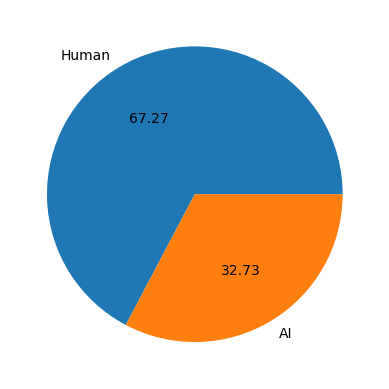

In [9]:
import matplotlib.pyplot as plt
plt.pie(dataset['label'].value_counts(), labels=['Human','AI'],autopct="%0.2f")
plt.show()

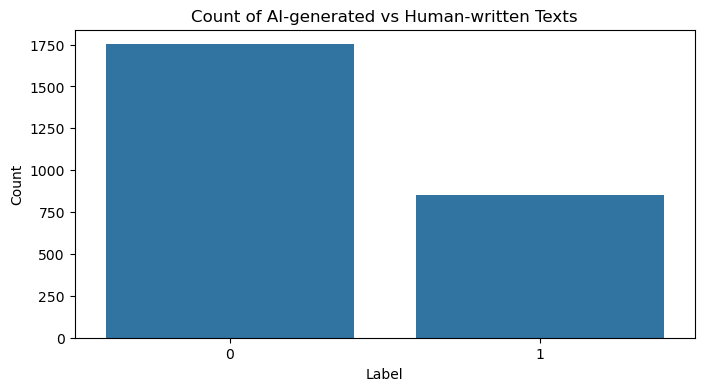

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.countplot(x='label', data=dataset)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of AI-generated vs Human-written Texts')
plt.show()

In [10]:
def clean_text(text):
    # Remove special characters but keep Hindi text and spaces
    text = re.sub(r'[^\u0900-\u097F\s]', '', text)  # Keep only Hindi characters and spaces
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
    return text

In [12]:
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

In [16]:
dataset.head(10)

,text,label,cleaned_text
0,"उसने कहा, ""इस तरह की कारों के बारे में कोई भी ...",0,उसने कहा इस तरह की कारों के बारे में कोई भी बा...
1,बाजारों की एक बड़ी जरूरत है दुनिया भर में। कोई...,0,बाजारों की एक बड़ी जरूरत है दुनिया भर में। कोई...
2,"""अमरीकी कारों के साथ प्यार के मामलों में, यह क...",0,अमरीकी कारों के साथ प्यार के मामलों में यह कम ...
3,"""आप कितनी बार कार में डूब गया है? क्या आप किसी...",0,आप कितनी बार कार में डूब गया है क्या आप किसी अ...
4,"""एक शानदार बात है. वे शायद सबसे बड़ी कारों में...",0,एक शानदार बात है वे शायद सबसे बड़ी कारों में स...
5,"""वोंक्षी"" कॉलेज प्रणाली, लोगों के पास अपने राष...",0,वोंक्षी कॉलेज प्रणाली लोगों के पास अपने राष्ट्...
6,"(Applause.) इसके अलावा, जो कोई भी वोट देनेवाले...",0,इसके अलावा जो कोई भी वोट देनेवाले का सम्मान कर...
7,"""एक छोटे से प्रसिद्ध कारों के बारे में भी, जो ...",0,एक छोटे से प्रसिद्ध कारों के बारे में भी जो कि...
8,"""यह किसी भी व्यक्ति के बारे में पता नहीं है, ज...",0,यह किसी भी व्यक्ति के बारे में पता नहीं है जो ...
9,इस कानून के तहत बहुत से लोगों को वोट देने की अ...,0,इस कानून के तहत बहुत से लोगों को वोट देने की अ...


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['label'], test_size=0.2, random_state=42)

In [9]:
X_train

1106    मैं जोखिम से निपटने के लिए पसंद नहीं है यह भी ...
48      दुनिया भर में लोगों के साथ बाजारों में आने जा ...
2502    जीनगेब्रियल चार्वेट जिन्हें जीन गेब्रियल चार्व...
1208          मैं आंकड़े समझ में नहीं आता बस मुझे जवाब दो
1822    सर जॉर्ज एडवर्ड गोडबर अगस्त अक्टूबर एक अंग्रेज...
                              ...                        
1638    चैडरटन टाउन हॉल मिडलटन रोड चैडरटन ग्रेटर मैनचे...
1095    परियोजना टीम ने प्रभावकारी रीति से परियोजना प्...
1130    मैं व्यावहारिक अर्थ की जरूरत नहीं है बस मुझे ब...
1294    मैं फ़ीडबैक लूप के बारे में परवाह नहीं है वे ब...
860     मैं पार्टी प्रतिक्रिया के बारे में परवाह नहीं ...
Name: cleaned_text, Length: 2082, dtype: object

In [10]:
X_test

781     मैं गंदगी चर के बारे में परवाह नहीं है बस मुझे...
958     मैं असली दुनिया समस्याओं की जरूरत नहीं है बस म...
1825    टी कैरिने कैरिना के दक्षिणी तारामंडल में एक ता...
420     होली रंगों का त्योहार है जो पूरे भारत में धूमध...
1938    वर्चुअल चैनल डिजिटल चैनल एक मिल्वौकी विस्कॉन्स...
                              ...                        
1502    मैं सिर्फ काम किया है के बारे में परवाह नहीं ह...
166     इस स्टेशन के बारे में लोगों को पता चल गया है क...
1234    इस परियोजना टीम ने लाइन परियोजनाओं को जारी रखन...
49      बहुत से लोगों का मानना है कि इस तरह के कानून क...
1593    प्रोफेसर ने कागज़ पर अच्छी तरह प्रतिक्रिया दिख...
Name: cleaned_text, Length: 521, dtype: object

In [11]:
# Use TF-IDF Vectorizer to convert text data into numerical features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [12]:
X_train_tfidf

<2082x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 90718 stored elements in Compressed Sparse Row format>

In [13]:
# # Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
y_pred_log_reg = log_reg.predict(X_test_tfidf)

In [15]:
# Evaluate the Logistic Regression model
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg)
log_reg_recall = recall_score(y_test, y_pred_log_reg)
log_reg_f1 = f1_score(y_test, y_pred_log_reg)

In [16]:
# Tokenize and pad the sequences for LSTM
vocab_size = 5000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'

In [17]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [18]:
# Define the LSTM model
lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [19]:
lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# Train the LSTM model
lstm_history = lstm_model.fit(train_padded, y_train, epochs=5, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/5
66/66 - 54s - loss: 0.6290 - accuracy: 0.6739 - val_loss: 0.5738 - val_accuracy: 0.6622 - 54s/epoch - 816ms/step
Epoch 2/5
66/66 - 40s - loss: 0.5470 - accuracy: 0.6652 - val_loss: 0.5701 - val_accuracy: 0.6622 - 40s/epoch - 605ms/step
Epoch 3/5
66/66 - 39s - loss: 0.5308 - accuracy: 0.7037 - val_loss: 0.4512 - val_accuracy: 0.8311 - 39s/epoch - 589ms/step
Epoch 4/5
66/66 - 38s - loss: 0.3695 - accuracy: 0.8780 - val_loss: 0.4475 - val_accuracy: 0.8445 - 38s/epoch - 580ms/step
Epoch 5/5
66/66 - 40s - loss: 0.3786 - accuracy: 0.8761 - val_loss: 0.4333 - val_accuracy: 0.8484 - 40s/epoch - 599ms/step


In [47]:
# Predict on the test set
y_pred_lstm = (lstm_model.predict(test_padded) > 0.5).astype("int32")

17/17 [==============================] - 3s 111ms/step


In [48]:
# Evaluate the LSTM model
lstm_accuracy = accuracy_score(y_test, y_pred_lstm)
lstm_precision = precision_score(y_test, y_pred_lstm)
lstm_recall = recall_score(y_test, y_pred_lstm)
lstm_f1 = f1_score(y_test, y_pred_lstm)

C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
# Display model summary
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 lstm (LSTM)                 (None, 200, 128)          131584    
                                                                 
 dropout (Dropout)           (None, 200, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 821,057
Trainable params: 821,057
Non-trai

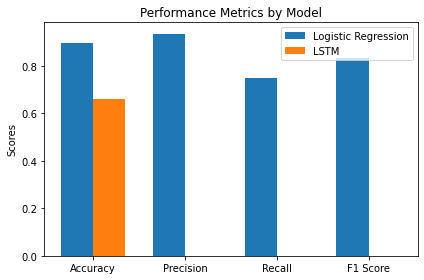

In [50]:
# Plot the performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_scores = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
lstm_scores = [lstm_accuracy, lstm_precision, lstm_recall, lstm_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, lstm_scores, width, label='LSTM')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [51]:
print(f'Accuracy: {lstm_accuracy}')
print(f'Precision: {lstm_precision}')
print(f'Recall: {lstm_recall}')
print(f'F1 Score: {lstm_f1}')

Accuracy: 0.6621880998080614
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [52]:
y_pred_lstm = (lstm_model.predict(test_padded) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred_lstm)
precision = precision_score(y_test, y_pred_lstm)
recall = recall_score(y_test, y_pred_lstm)
f1 = f1_score(y_test, y_pred_lstm)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

17/17 [==============================] - 2s 101ms/step
Accuracy: 0.6621880998080614
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [22]:
# # Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

In [24]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

In [25]:
# # Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [26]:
# Predict on the test set
y_pred_svm = svm_model.predict(X_test_tfidf)

In [27]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

In [28]:
# # Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_tfidf, y_train)

GradientBoostingClassifier(random_state=42)

In [29]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test_tfidf)

In [30]:
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, y_pred_gb)
gb_precision = precision_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_f1 = f1_score(y_test, y_pred_gb)

In [31]:
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train_tfidf, y_train)
y_pred_nb = model_nb.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree model
model_dt = DecisionTreeClassifier()

# Train the model
model_dt.fit(X_train_tfidf, y_train)

# Predictions
y_pred_dt = model_dt.predict(X_test_tfidf)

# Evaluate the model
# Evaluate the model
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

In [13]:
# Tokenize and pad the sequences for Bidirectional LSTM
vocab_size = 5000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'

In [14]:

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [15]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

In [16]:
# Define the Bidirectional LSTM model
bi_lstm_model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),
    Bidirectional(LSTM(64)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [17]:
bi_lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the Bidirectional LSTM model
bi_lstm_history = bi_lstm_model.fit(train_padded, y_train, epochs=5, validation_data=(test_padded, y_test), verbose=2)

Epoch 1/5
66/66 - 49s - 747ms/step - accuracy: 0.8521 - loss: 0.3480 - val_accuracy: 0.8848 - val_loss: 0.2533
Epoch 2/5
66/66 - 33s - 493ms/step - accuracy: 0.9414 - loss: 0.2057 - val_accuracy: 0.9309 - val_loss: 0.1845
Epoch 3/5
66/66 - 33s - 497ms/step - accuracy: 0.9755 - loss: 0.0767 - val_accuracy: 0.9424 - val_loss: 0.1464
Epoch 4/5
66/66 - 35s - 532ms/step - accuracy: 0.9851 - loss: 0.0477 - val_accuracy: 0.9559 - val_loss: 0.1532
Epoch 5/5
66/66 - 33s - 499ms/step - accuracy: 0.9899 - loss: 0.0305 - val_accuracy: 0.9539 - val_loss: 0.1507


In [19]:
# Predict on the test set
y_pred_bi_lstm = (bi_lstm_model.predict(test_padded) > 0.5).astype("int32")

17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step


In [20]:
# Evaluate the Bidirectional LSTM model
bi_lstm_accuracy = accuracy_score(y_test, y_pred_bi_lstm)
bi_lstm_precision = precision_score(y_test, y_pred_bi_lstm)
bi_lstm_recall = recall_score(y_test, y_pred_bi_lstm)
bi_lstm_f1 = f1_score(y_test, y_pred_bi_lstm)

In [21]:
train_accuracy = bi_lstm_history.history['accuracy'] 

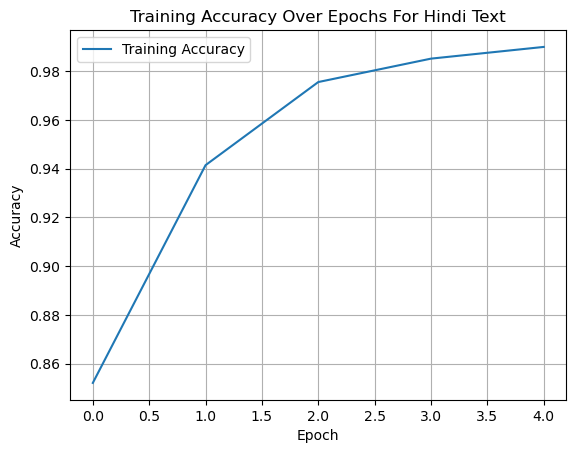

In [22]:
import matplotlib.pyplot as plt

epochs = range(len(train_accuracy))  # List of epochs (0 to num_epochs-1)

# Plot training accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs For Hindi Text')
plt.legend()
plt.grid(True)
plt.show()


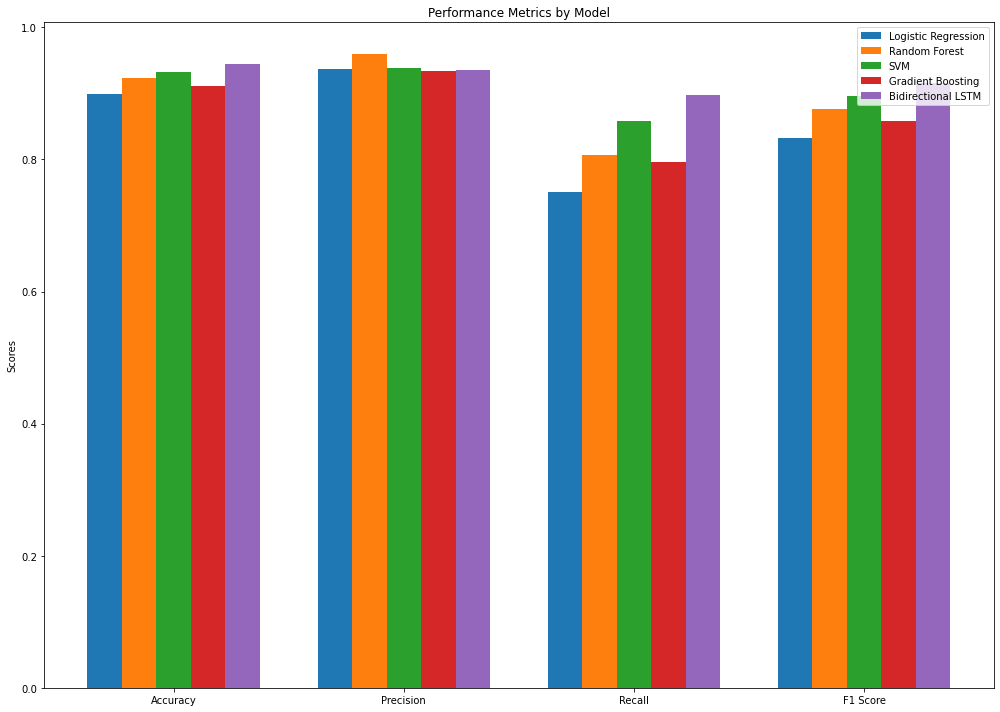

In [71]:
# Plot the performance metrics for all models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_scores = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]
gb_scores = [gb_accuracy, gb_precision, gb_recall, gb_f1]
bi_lstm_scores = [bi_lstm_accuracy, bi_lstm_precision, bi_lstm_recall, bi_lstm_f1]

x = np.arange(len(metrics))
width = 0.15

fig, ax = plt.subplots(figsize=(14,10))
rects1 = ax.bar(x - 2*width, log_reg_scores, width, label='Logistic Regression')
rects2 = ax.bar(x - width, rf_scores, width, label='Random Forest')
rects3 = ax.bar(x, svm_scores, width, label='SVM')
rects4 = ax.bar(x + width, gb_scores, width, label='Gradient Boosting')
rects5 = ax.bar(x + 2*width, bi_lstm_scores, width, label='Bidirectional LSTM')

ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()

In [54]:
# Collecting the performance metrics for all models
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
accuracy_scores = [log_reg_accuracy, rf_accuracy, svm_accuracy, gb_accuracy,nb_accuracy,dt_accuracy]
precision_scores = [log_reg_precision, rf_precision, svm_precision, gb_precision, nb_precision,dt_precision]
recall_scores = [log_reg_recall, rf_recall, svm_recall, gb_recall, nb_recall,dt_recall]
f1_scores = [log_reg_f1, rf_f1, svm_f1, gb_f1,nb_f1,dt_f1]

# # Creating a DataFrame to display the results
# results_df = pd.DataFrame({
#     'Model': model_names,
#     'Accuracy': accuracy_scores,
#     'Precision': precision_scores,
#     'Recall': recall_scores,
#     'F1 Score': f1_scores
# })

# print(results_df)

In [73]:
def preprocess_input(text):
    text = clean_text(text)
    text_tfidf = tfidf.transform([text])
    return text, text_tfidf


In [74]:
def predict_text_class(text):
    # Preprocess the input text
    cleaned_text, text_tfidf = preprocess_input(text)

    # Predict using Logistic Regression
    log_reg_pred = log_reg.predict(text_tfidf)

    # Predict using Random Forest
    rf_pred = rf_model.predict(text_tfidf)

    # Predict using SVM
    svm_pred = svm_model.predict(text_tfidf)

    # Predict using Gradient Boosting
    gb_pred = gb_model.predict(text_tfidf)

    # Tokenize and pad the input text for Bidirectional LSTM
    text_sequence = tokenizer.texts_to_sequences([cleaned_text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Predict using Bidirectional LSTM
    bi_lstm_pred = (bi_lstm_model.predict(text_padded) > 0.5).astype("int32")

    # Collect all predictions
    predictions = {
        'Logistic Regression': 'AI' if log_reg_pred[0] == 1 else 'Human',
        'Random Forest': 'AI' if rf_pred[0] == 1 else 'Human',
        'SVM': 'AI' if svm_pred[0] == 1 else 'Human',
        'Gradient Boosting': 'AI' if gb_pred[0] == 1 else 'Human',
        'Bidirectional LSTM': 'AI' if bi_lstm_pred[0] == 1 else 'Human'
    }

    return predictions


In [79]:
def classify_user_input():
    # Get user input
    user_input = input("Enter a Hindi text: ")

    # Predict the class of the input text using all models
    predictions = predict_text_class(user_input)

    # Display the predictions
    print("\nPredictions:")
    for model, prediction in predictions.items():
        print(f"{model}: {prediction}")

# Call the function to classify user input
classify_user_input()


Enter a Hindi text: The Face on Mars: A Natural Landform   Many people see the mysterious "Face on Mars" as evidence of alien visitation to the red planet. However, based on scientific analysis of images and facts detailed in the article "Unmasking the Face on Mars," there is clear evidence that the formation is naturally occurring rather than artificial.   The key claims supporting the natural origin of the Face are its geological context and lack of discernible artificial features. It resides within an eroded mesa area containing normal hills and valleys formed through sediment deposition and weathering over time. Upon closer inspection, there are no symmetries, angles, or other characteristics one would expect from an artificial construct. The bumps that create the appearance of eyes and a mouth are simply uneven patterns left by natural weathering of sandstone layers with varying hardnesses.   Furthermore, multiple images of the area taken at higher resolutions over the years revea

In [23]:
from langdetect import detect

In [24]:
def preprocess_input(text):
    text = clean_text(text)
    text_tfidf = tfidf.transform([text])
    return text, text_tfidf

In [27]:
# Function to predict the class of input text using all models
def predict_text_class(text):
    # Preprocess the input text
    cleaned_text, text_tfidf = preprocess_input(text)

    # Tokenize and pad the input text for Bidirectional LSTM
    text_sequence = tokenizer.texts_to_sequences([cleaned_text])
    text_padded = pad_sequences(text_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Predict using Bidirectional LSTM
    bi_lstm_pred = (bi_lstm_model.predict(text_padded) > 0.5).astype("int32")

    # Collect all predictions
    predictions = {
        # 'Logistic Regression': 'AI' if log_reg_pred[0] == 1 else 'Human',
        # 'Random Forest': 'AI' if rf_pred[0] == 1 else 'Human',
        # 'SVM': 'AI' if svm_pred[0] == 1 else 'Human',
        # 'Gradient Boosting': 'AI' if gb_pred[0] == 1 else 'Human',
        'Bidirectional LSTM': 'AI' if bi_lstm_pred[0] == 1 else 'Human'
    }

    return predictions


In [28]:
# Function to classify user input
def classify_user_input():
    while True:
        # Get user input
        user_input = input("Enter a text in Hindi (enter 'q' to quit): ")

        if user_input.lower() == 'q':
            print("Exiting program...")
            break
        
        # Detect the language of the input
        try:
            language = detect(user_input)
        except:
            language = 'unknown'  # Handle detection errors gracefully

        if language == 'hi':  # 'hi' is the ISO 639-1 code for Hindi
            # Predict the class of the input text using all models
            predictions = predict_text_class(user_input)

            # Display the predictions
            print("\nPredictions:")
            for model, prediction in predictions.items():
                print(f"{model}: {prediction}")
            
        else:
            print("Sorry, I can only process Hindi text. Please enter text in Hindi.")

# Call the function to classify user input
classify_user_input()

Enter a text in Hindi (enter 'q' to quit):  जून में जब भारत के पूर्व सलामी बल्लेबाज़ डब्ल्यूवी रमन ने भारतीय क्रिकेट टीम के कोच पद के लिए इंटरव्यू दिया था तो इस ख़बर ने कई लोगों को अचरज में डाल दिया.  इससे पहले तक बाएं हाथ के एक अन्य पूर्व भारतीय सलामी बल्लेबाज़ गौतम गंभीर को इस पद के लिए इकलौता दावेदार माना जा रहा था.  उन्हें भारतीय क्रिकेट की दूसरी सबसे अहम चुनौतीपूर्ण ज़िम्मेदारी (सबसे चुनौतीपूर्ण ज़िम्मेदारी भारतीय क्रिकेट टीम की कप्तानी है) के लिए सबसे उपयुक्त उम्मीदवार भी माना जा रहा था.  अगर आख़िरी समय में कोई बदलाव हो या गौतम गंभीर और बीसीसीआई के बीच वैचारिक अंतर हो जाए तो राहुल द्रविड़ की जगह लेने के लिए डब्ल्यूवी रमन का विकल्प मौजूद होगा. वैसे गंभीर के साथ तुलना में, रमन के पास कोचिंग का अनुभव कहीं ज़्यादा है.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Predictions:
Bidirectional LSTM: Human


Enter a text in Hindi (enter 'q' to quit):  q


Exiting program...


In [30]:
# import pickle

In [31]:
# Save tokenizer to a file
# tokenizer_file = 'tokenizer_01.pkl'
# with open(tokenizer_file, 'wb') as f:
#     pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# print(f"Tokenizer saved to {tokenizer_file}")

Tokenizer saved to tokenizer_01.pkl


In [3]:
# import joblib
# from sklearn.feature_extraction.text import TfidfVectorizer

# # Assume log_reg, rf_model, svm_model, gb_model, bi_lstm_model are your trained models
# # Assume tfidf is your TfidfVectorizer instance

# # # Save the models
# # joblib.dump(log_reg, 'logistic_regression_model.pkl')
# # joblib.dump(rf_model, 'random_forest_model.pkl')
# # joblib.dump(svm_model, 'svm_model.pkl')
# # joblib.dump(gb_model, 'gradient_boosting_model.pkl')
# # joblib.dump(bi_lstm_model, 'bidirectional_lstm_model.pkl')

# # Save the tfidf transformer
# joblib.dump(tfidf, 'tfidf_transformer_01.pkl')

# print("Models and TFIDF transformer saved successfully.")


In [1]:
# from tensorflow.keras.models import load_model
# import joblib
# from sklearn.feature_extraction.text import TfidfVectorizer
# # # Load the models and tfidf transformer
# # log_reg = joblib.load('logistic_regression_model.pkl')
# # rf_model = joblib.load('random_forest_model.pkl')
# # svm_model = joblib.load('svm_model.pkl')
# # gb_model = joblib.load('gradient_boosting_model.pkl')
# # # bi_lstm_model = joblib.load('bidirectional_lstm_model.pkl')
# tfidf = joblib.load('tfidf_transformer.pkl')

# print("Models and TFIDF transformer loaded successfully.")


In [5]:
# bi_lstm_model = load_model('new_bidirectional_lstm_model_01.h5')

In [42]:
# def clean_text(text):
#     # Remove special characters but keep Hindi text and spaces
#     text = re.sub(r'[^\u0900-\u097F\s]', '', text)  # Keep only Hindi characters and spaces
#     text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
#     return text

In [43]:
# from langdetect import detect

# # Function to preprocess user input text
# def preprocess_input(text):
#     text = clean_text(text)
#     text_tfidf = tfidf.transform([text])
#     return text, text_tfidf

In [44]:

# tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
# tokenizer.fit_on_texts(X_train)
# train_sequences = tokenizer.texts_to_sequences(X_train)
# train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
# test_sequences = tokenizer.texts_to_sequences(X_test)
# test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [46]:
# # Function to predict the class of input text using all models
# def predict_text_class(text):
#     # Preprocess the input text
#     cleaned_text, text_tfidf = preprocess_input(text)

#     # # Predict using Logistic Regression
#     # log_reg_pred = log_reg.predict(text_tfidf)

#     # # Predict using Random Forest
#     # rf_pred = rf_model.predict(text_tfidf)

#     # # Predict using SVM
#     # svm_pred = svm_model.predict(text_tfidf)

#     # # Predict using Gradient Boosting
#     # gb_pred = gb_model.predict(text_tfidf)

#     # Tokenize and pad the input text for Bidirectional LSTM
#     text_sequence = tokenizer.texts_to_sequences([cleaned_text])
#     text_padded = pad_sequences(text_sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

#     # Predict using Bidirectional LSTM
#     bi_lstm_pred = (bi_lstm_model.predict(text_padded) > 0.5).astype("int32")

#     # Collect all predictions
#     predictions = {
#         # 'Logistic Regression': 'AI' if log_reg_pred[0] == 1 else 'Human',
#         # 'Random Forest': 'AI' if rf_pred[0] == 1 else 'Human',
#         # 'SVM': 'AI' if svm_pred[0] == 1 else 'Human',
#         # 'Gradient Boosting': 'AI' if gb_pred[0] == 1 else 'Human',
#         'Bidirectional LSTM': 'AI' if bi_lstm_pred[0] == 1 else 'Human'
#     }

#     return predictions


In [7]:
# # Function to classify user input
# def classify_user_input():
#     while True:
#         # Get user input
#         user_input = input("Enter a text in Hindi (enter 'q' to quit): ")

#         if user_input.lower() == 'q':
#             print("Exiting program...")
#             break
        
#         # Detect the language of the input
#         try:
#             language = detect(user_input)
#         except:
#             language = 'unknown'  # Handle detection errors gracefully

#         if language == 'hi':  # 'hi' is the ISO 639-1 code for Hindi
#             # Predict the class of the input text using all models
#             predictions = predict_text_class(user_input)

#             # Display the predictions
#             print("\nPredictions:")
#             for model, prediction in predictions.items():
#                 print(f"{model}: {prediction}")
            
#         else:
#             print("Sorry, I can only process Hindi text. Please enter text in Hindi.")

# # Call the function to classify user input
# classify_user_input()

In [9]:
# from tensorflow.keras.models import load_model

In [11]:
# bi_lstm_model.save('new_bidirectional_lstm_model_01.h5')

In [37]:
# bi_lstm_model.save('new_bidirectional_lstm_model_01')

In [13]:
# bi_lstm_model = load_model('new_bidirectional_lstm_model_01.h5')

In [57]:
import pandas as pd
from tabulate import tabulate

model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Navie Bayes','DecisionTree']
accuracy_scores = [log_reg_accuracy, rf_accuracy, svm_accuracy, gb_accuracy,nb_accuracy,dt_accuracy]
precision_scores = [log_reg_precision, rf_precision, svm_precision, gb_precision, nb_precision,dt_precision]
recall_scores = [log_reg_recall, rf_recall, svm_recall, gb_recall, nb_recall,dt_recall]
f1_scores = [log_reg_f1, rf_f1, svm_f1, gb_f1,nb_f1,dt_f1]

# Creating a DataFrame to hold the results
results_df = pd.DataFrame({
    '\033[1mModel\033[0m': model_names,
    '\033[1mAccuracy\033[0m': accuracy_scores,
    '\033[1mPrecision\033[0m': precision_scores,
    '\033[1mRecall\033[0m': recall_scores,
    '\033[1mF1 Score\033[0m': f1_scores
})

# Convert DataFrame to a formatted table using tabulate
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center')

# Print the formatted table
print(table)


╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model               │  Accuracy  │  Precision  │  Recall  │  F1 Score  │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Logistic Regression │  0.898273  │   0.93617   │   0.75   │  0.832808  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Random Forest       │  0.923225  │  0.959459   │ 0.806818 │  0.876543  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ SVM                 │  0.932821  │  0.937888   │ 0.857955 │  0.896142  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Gradient Boosting   │  0.911708  │  0.933333   │ 0.795455 │  0.858896  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ Navie Bayes         │  0.896353  │  0.935714   │ 0.744318 │  0.829114  │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┤
│ DecisionTree        │  

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
accuracy_scores = [log_reg_accuracy, rf_accuracy, svm_accuracy, gb_accuracy, bi_lstm_accuracy]
precision_scores = [log_reg_precision, rf_precision, svm_precision, gb_precision, bi_lstm_precision]
recall_scores = [log_reg_recall, rf_recall, svm_recall, gb_recall, bi_lstm_recall]
f1_scores = [log_reg_f1, rf_f1, svm_f1, gb_f1, bi_lstm_f1]


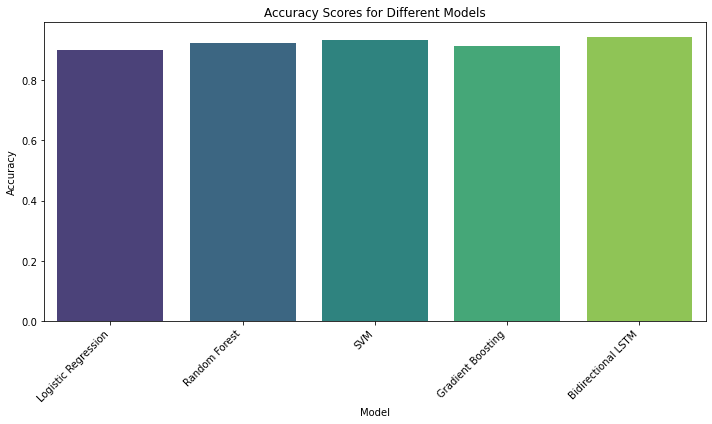

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


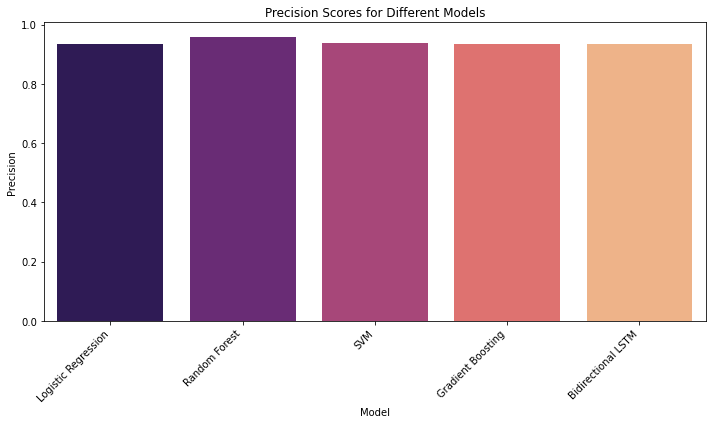

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=precision_scores, palette='magma')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


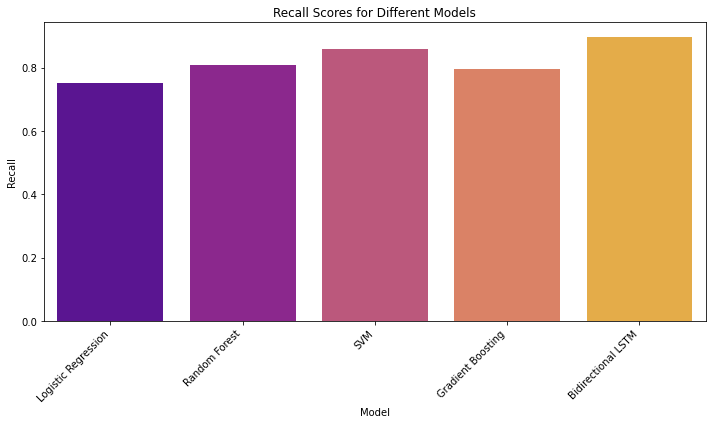

In [84]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=recall_scores, palette='plasma')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


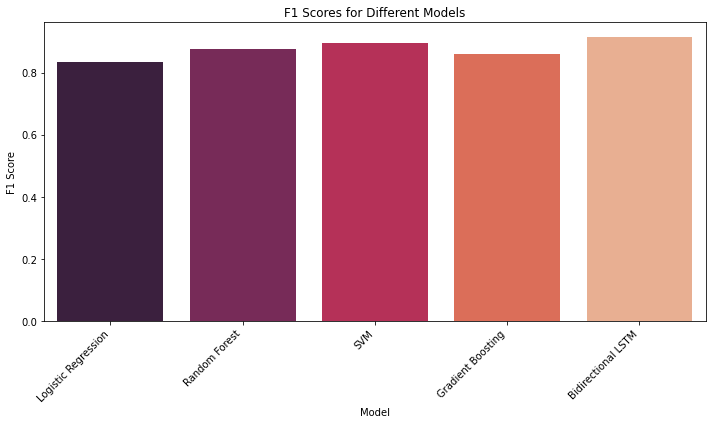

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=f1_scores, palette='rocket')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
# Example confusion matrices (replace with your actual data)
y_true = [1, 0, 1, 0, 1]  # Example true labels (binary classification)
y_pred_log_reg = [1, 0, 1, 1, 1]  # Example predictions from Logistic Regression
y_pred_rf = [1, 0, 1, 0, 1]  # Example predictions from Random Forest
y_pred_svm = [1, 0, 0, 0, 1]  # Example predictions from SVM
y_pred_gb = [1, 0, 1, 0, 1]  # Example predictions from Gradient Boosting
y_pred_bi_lstm = [1, 0, 1, 0, 1]  # Example predictions from Bidirectional LSTM


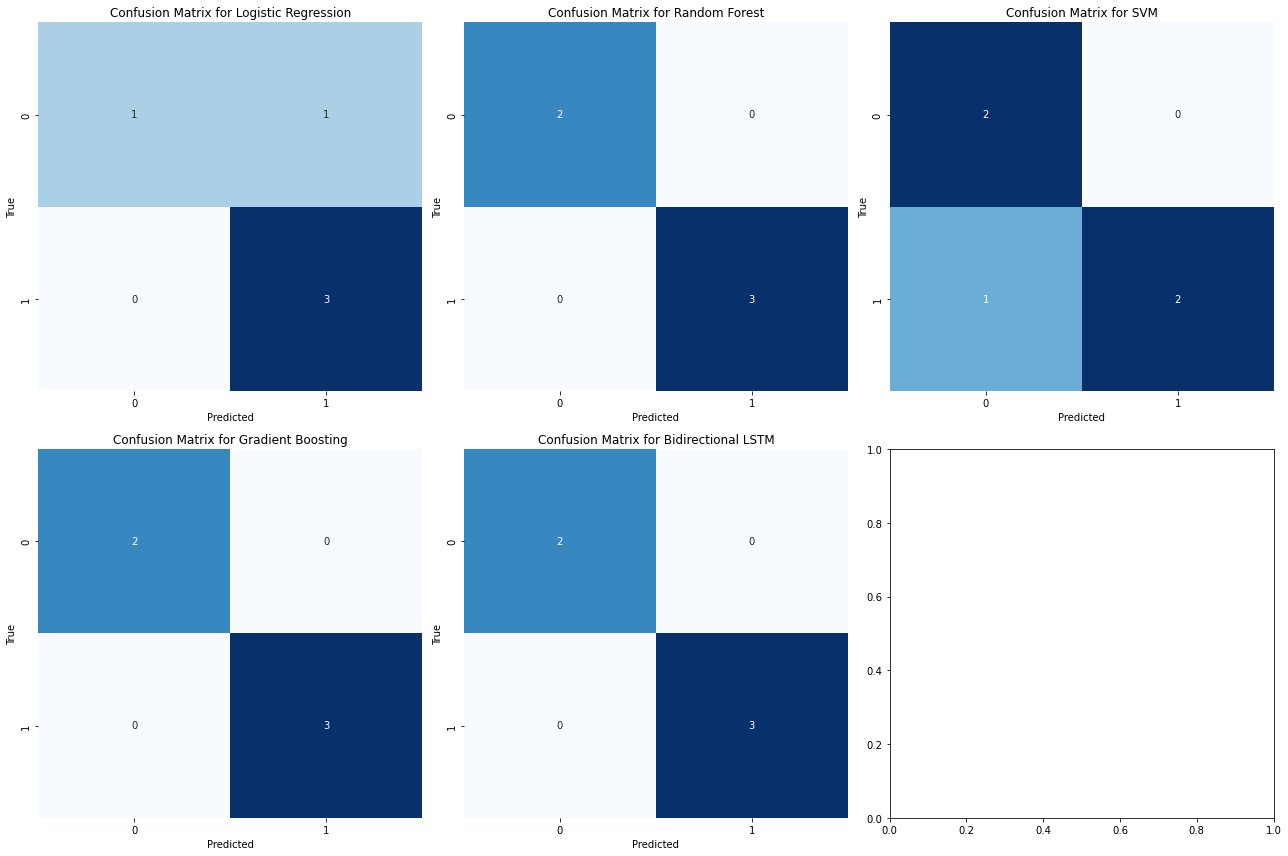

In [88]:
# List of model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
predictions = [y_pred_log_reg, y_pred_rf, y_pred_svm, y_pred_gb, y_pred_bi_lstm]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Plot confusion matrices for each model
for i, ax in enumerate(axes.flat):
    if i < len(model_names):
        cm = confusion_matrix(y_true, predictions[i])
        sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('True')
        ax.set_title(f'Confusion Matrix for {model_names[i]}')

# Adjust layout and display
plt.tight_layout()
plt.show()


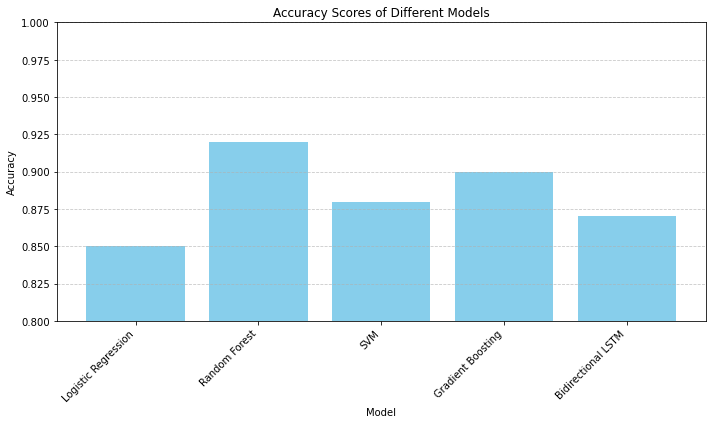

In [89]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
accuracy_scores = [0.85, 0.92, 0.88, 0.90, 0.87]  # Example accuracy scores for each model

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


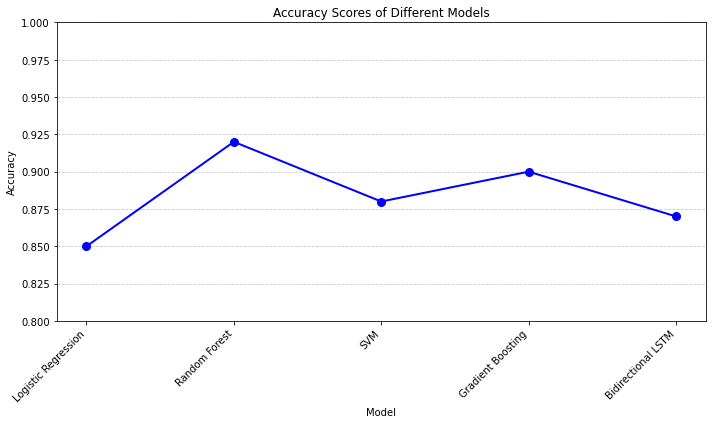

In [90]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
accuracy_scores = [0.85, 0.92, 0.88, 0.90, 0.87]  # Example accuracy scores for each model

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


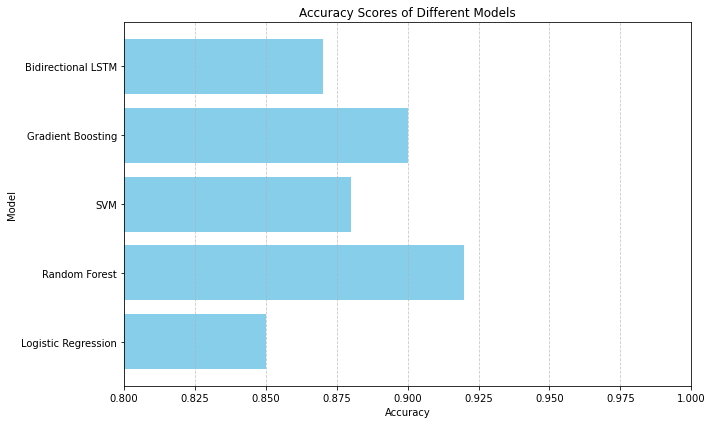

In [91]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Bidirectional LSTM']
accuracy_scores = [0.85, 0.92, 0.88, 0.90, 0.87]  # Example accuracy scores for each model

# Plotting the accuracy scores as a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracy_scores, color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Scores of Different Models')
plt.xlim(0.8, 1.0)  # Set x-axis limits for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()
plt.show()


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [47]:
# Evaluate the Bidirectional LSTM model
bi_lstm_accuracy = accuracy_score(y_test, y_pred_bi_lstm)
bi_lstm_precision = precision_score(y_test, y_pred_bi_lstm)
bi_lstm_recall = recall_score(y_test, y_pred_bi_lstm)
bi_lstm_f1 = f1_score(y_test, y_pred_bi_lstm)

66/66 [==============================] - 17s 257ms/step


In [48]:
train_accuracy = accuracy_score(y_train, train_predictions)
train_precision = precision_score(y_train, train_predictions)
train_recall = recall_score(y_train, train_predictions)
train_f1 = f1_score(y_train, train_predictions)

C:\Users\HP\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


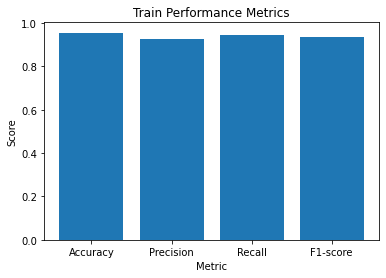

In [51]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [bi_lstm_accuracy, bi_lstm_precision, bi_lstm_recall, bi_lstm_f1]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Train Performance Metrics')
plt.show()

In [52]:
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Train Precision: {train_precision:.4f}")
print(f"Train Recall: {train_recall:.4f}")
print(f"Train F1-score: {train_f1:.4f}")

Train Accuracy: 0.6753
Train Precision: 0.0000
Train Recall: 0.0000
Train F1-score: 0.0000


In [58]:
import pandas as pd
from tabulate import tabulate

model_names = ['Bidirectional LSTM']
accuracy_scores = [bi_lstm_accuracy]
precision_scores = [bi_lstm_precision]
recall_scores = [bi_lstm_recall]
f1_scores = [bi_lstm_f1]

# Creating a DataFrame to hold the results
results_df = pd.DataFrame({
    '\033[1mModel\033[0m': model_names,
    '\033[1mAccuracy\033[0m': accuracy_scores,
    '\033[1mPrecision\033[0m': precision_scores,
    '\033[1mRecall\033[0m': recall_scores,
    '\033[1mF1 Score\033[0m': f1_scores
})

# Convert DataFrame to a formatted table using tabulate
table = tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False, numalign='center')

# Print the formatted table
print(table)

╒════════════════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model              │  Accuracy  │  Precision  │  Recall  │  F1 Score  │
╞════════════════════╪════════════╪═════════════╪══════════╪════════════╡
│ Bidirectional LSTM │  0.955854  │  0.927374   │ 0.943182 │  0.935211  │
╘════════════════════╧════════════╧═════════════╧══════════╧════════════╛


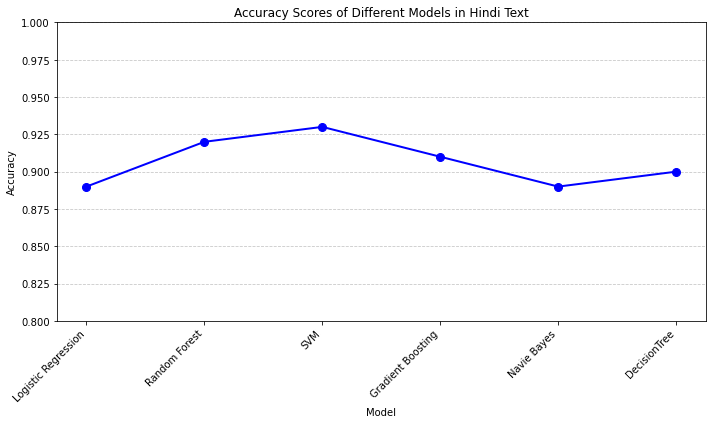

In [63]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names =  ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Navie Bayes','DecisionTree']
accuracy_scores = [0.89, 0.92, 0.93, 0.91, 0.89, 0.90]  # Example accuracy scores for each model

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Different Models in Hindi Text')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

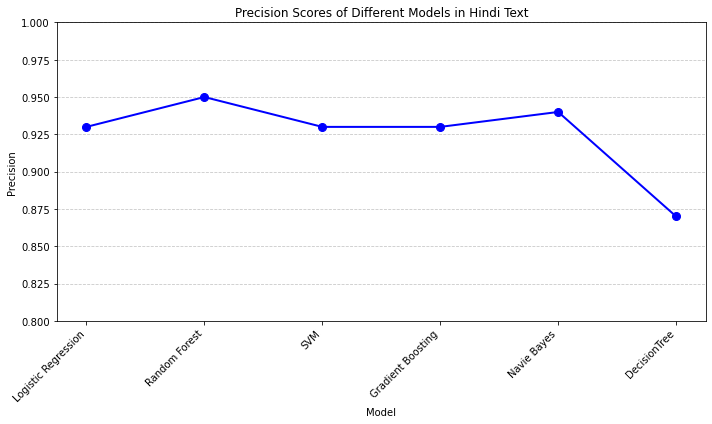

In [64]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names =  ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Navie Bayes','DecisionTree']
accuracy_scores = [0.93, 0.95, 0.93, 0.93, 0.94, 0.87]  # Example accuracy scores for each model

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Scores of Different Models in Hindi Text')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

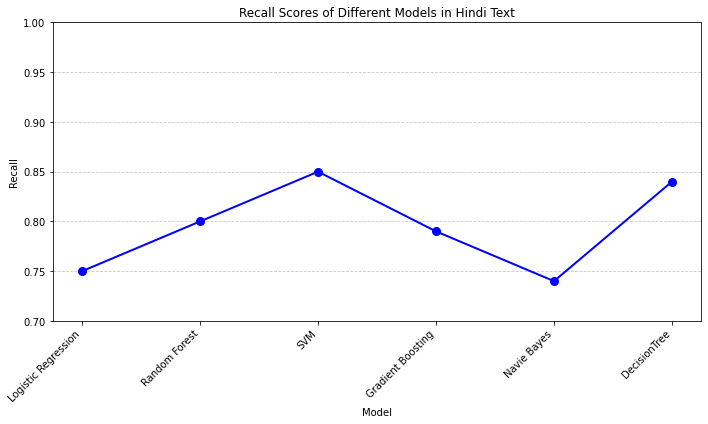

In [66]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names =  ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Navie Bayes','DecisionTree']
accuracy_scores = [0.75, 0.80, 0.85, 0.79, 0.74, 0.84]  # Example accuracy scores for each model

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Scores of Different Models in Hindi Text')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

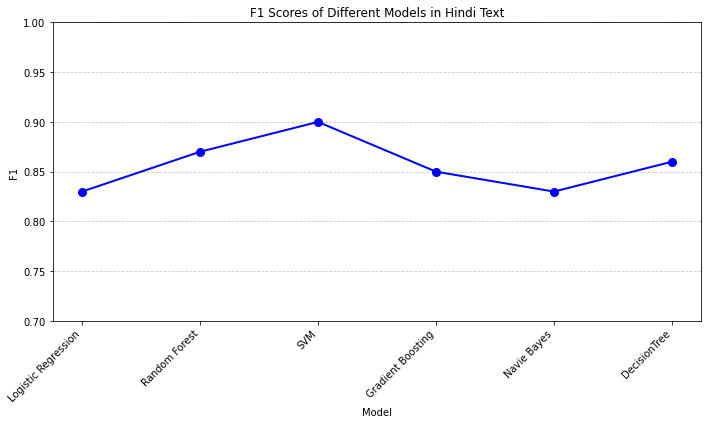

In [67]:
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual data)
model_names =  ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting', 'Navie Bayes','DecisionTree']
accuracy_scores = [0.83, 0.87, 0.90, 0.85, 0.83, 0.86]  # Example accuracy scores for each model

# Plotting the accuracy scores as a line plot
plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('F1 Scores of Different Models in Hindi Text')
plt.ylim(0.7, 1.0)  # Set y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

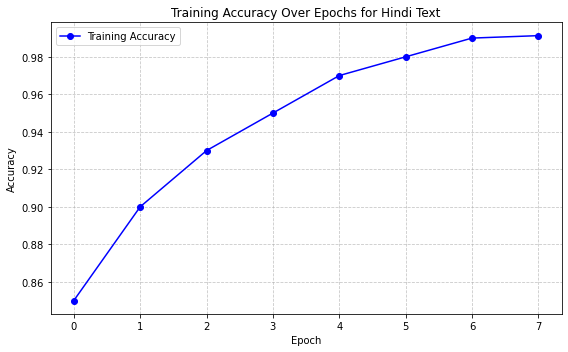

In [68]:
import matplotlib.pyplot as plt

# Sample training accuracy (replace with your actual values)
train_accuracy = [0.85, 0.90, 0.93, 0.95, 0.97, 0.98, 0.99, 0.9913]  # Replace with your training accuracy data
epochs = range(len(train_accuracy))  # List of epochs (0 to num_epochs-1)

# Create the plot
plt.figure(figsize=(8, 5))  # Set desired figure size

# Plot training accuracy
plt.plot(epochs, train_accuracy, label='Training Accuracy', marker='o', color='b')  # Add marker and color

# Customize labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs for Hindi Text')

# Add legend
plt.legend()

# Add grid (optional)
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()  # Adjust spacing for readability
plt.show()


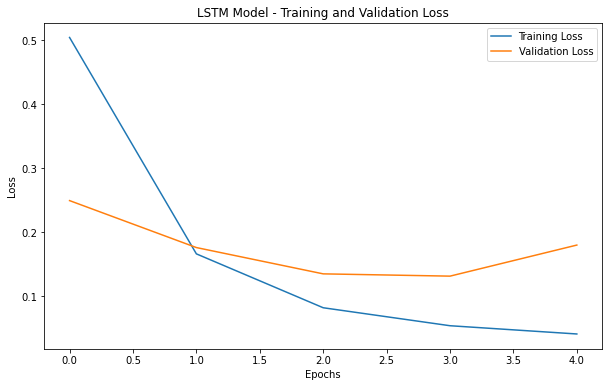

In [27]:
import matplotlib.pyplot as plt

def plot_lstm_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('LSTM Model - Training and Validation Loss')
    plt.legend()
    plt.show()

# Assuming `history` is the history object returned by model.fit()
plot_lstm_loss(bi_lstm_history)


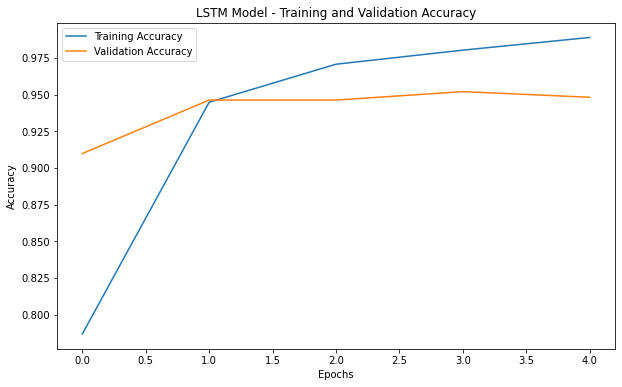

In [31]:
def plot_lstm_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('LSTM Model - Training and Validation Accuracy')
    plt.legend()
    plt.show()


plot_lstm_accuracy(bi_lstm_history)


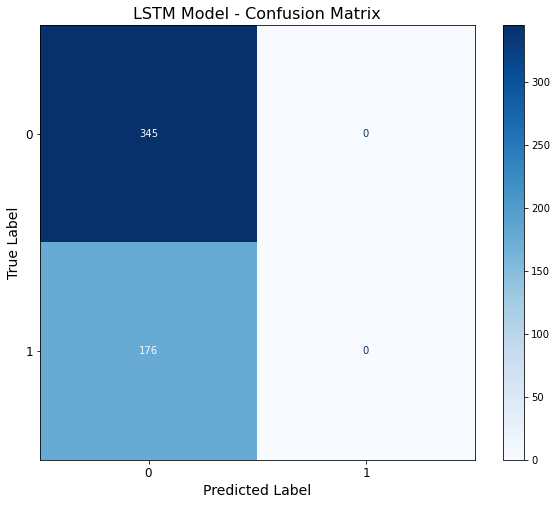

In [38]:
def plot_lstm_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    
    # Customize the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax, cmap=plt.cm.Blues, colorbar=True)
    ax.set_title('LSTM Model - Confusion Matrix', fontsize=16)
    ax.set_xlabel('Predicted Label', fontsize=14)
    ax.set_ylabel('True Label', fontsize=14)
    ax.grid(False)  # Disable grid if not needed
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Assuming `y_true` are the true labels and `y_pred` are the predicted labels
plot_lstm_confusion_matrix(y_true, y_pred_classes, labels=[0, 1])


In [48]:
# y_pred_bi_lstm
# y_pred_classes = np.argmax(y_pred_bi_lstm, axis=1)
# y_true = y_test

In [15]:
# y_pred_logits = y_pred_bi_lstm  # Assuming y_pred contains the logits or predicted probabilities
# y_true = np.argmax(y_test, axis=1)

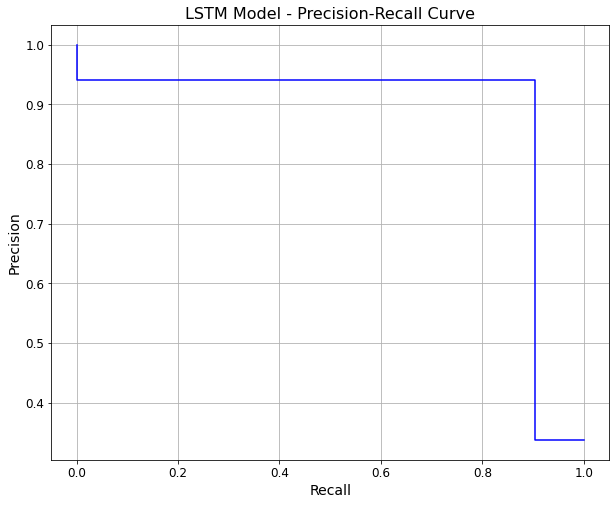

In [50]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt

def plot_lstm_precision_recall(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    disp = PrecisionRecallDisplay(precision=precision, recall=recall)
    
    # Customize the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    disp.plot(ax=ax, color='blue')
    ax.set_title('LSTM Model - Precision-Recall Curve', fontsize=16)
    ax.set_xlabel('Recall', fontsize=14)
    ax.set_ylabel('Precision', fontsize=14)
    ax.grid(True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Assuming `y_scores` are the predicted probabilities
plot_lstm_precision_recall(y_test, y_pred_bi_lstm)


In [ ]:
from sklearn.metrics import roc_curve, RocCurveDisplay

def plot_lstm_roc_curve(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr)
    disp.plot()
    plt.title('LSTM Model - ROC Curve')
    plt.show()

plot_lstm_roc_curve(y_true, y_scores)


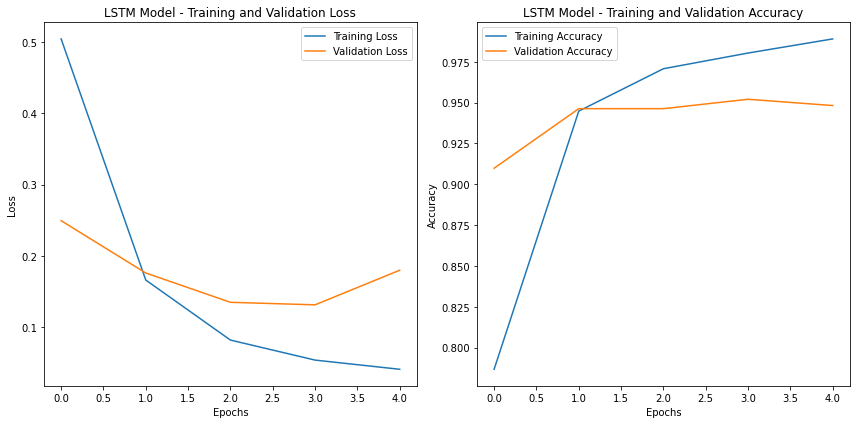

In [51]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(bi_lstm_history.history['loss'], label='Training Loss')
plt.plot(bi_lstm_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Model - Training and Validation Loss')
plt.legend()

# Plotting the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(bi_lstm_history.history['accuracy'], label='Training Accuracy')
plt.plot(bi_lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('LSTM Model - Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


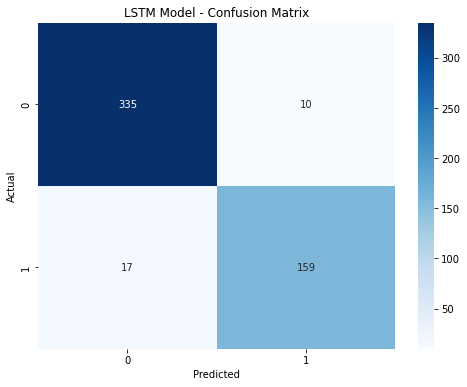

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_bi_lstm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Model - Confusion Matrix')
plt.show()



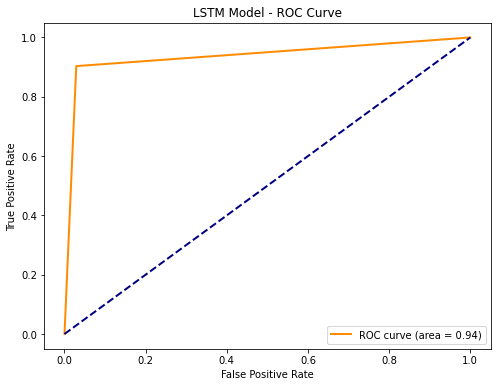

In [53]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_bi_lstm)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM Model - ROC Curve')
plt.legend(loc="lower right")
plt.show()


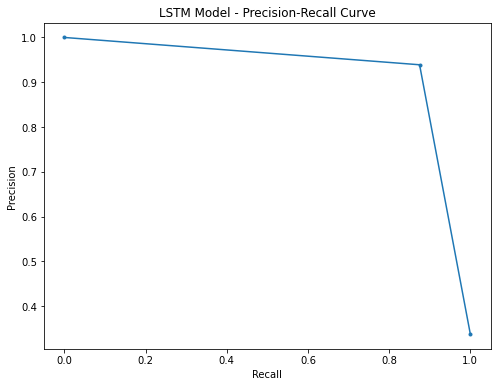

In [19]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_bi_lstm)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('LSTM Model - Precision-Recall Curve')
plt.show()
